## Pascal VOC Dataset

In [ ]:
# http://host.robots.ox.ac.uk/pascal/VOC/voc2012/#data 에서 다운로드 가능

In [1]:
!wget "http://host.robots.ox.ac.uk/pascal/VOC/voc2012/VOCtrainval_11-May-2012.tar"

--2021-09-29 00:19:41--  http://host.robots.ox.ac.uk/pascal/VOC/voc2012/VOCtrainval_11-May-2012.tar
Resolving host.robots.ox.ac.uk (host.robots.ox.ac.uk)... 129.67.94.152
Connecting to host.robots.ox.ac.uk (host.robots.ox.ac.uk)|129.67.94.152|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1999639040 (1.9G) [application/x-tar]
Saving to: ‘VOCtrainval_11-May-2012.tar’

VOCtrainval_11-May- 100%[===================>]   1.86G  12.1MB/s    in 2m 38s  

2021-09-29 00:22:19 (12.1 MB/s) - ‘VOCtrainval_11-May-2012.tar’ saved [1999639040/1999639040]



In [2]:
%pwd

'/content'

In [3]:
ls -la

total 1952796
drwxr-xr-x 1 root root       4096 Sep 29 00:19 ./
drwxr-xr-x 1 root root       4096 Sep 29 00:18 ../
drwxr-xr-x 4 root root       4096 Sep 16 13:39 .config/
drwxr-xr-x 1 root root       4096 Sep 16 13:40 sample_data/
-rw-r--r-- 1 root root 1999639040 Jan  1  2019 VOCtrainval_11-May-2012.tar


In [4]:
mkdir data

In [ ]:
!tar -xvf VOCtrainval_11-May-2012.tar -C ./data

In [9]:
cat /content/data/VOCdevkit/VOC2012/Annotations/2007_000032.xml

<annotation>
	<folder>VOC2012</folder>
	<filename>2007_000032.jpg</filename>
	<source>
		<database>The VOC2007 Database</database>
		<annotation>PASCAL VOC2007</annotation>
		<image>flickr</image>
	</source>
	<size>
		<width>500</width>
		<height>281</height>
		<depth>3</depth>
	</size>
	<segmented>1</segmented>
	<object>
		<name>aeroplane</name>
		<pose>Frontal</pose>
		<truncated>0</truncated>
		<difficult>0</difficult>
		<bndbox>
			<xmin>104</xmin>
			<ymin>78</ymin>
			<xmax>375</xmax>
			<ymax>183</ymax>
		</bndbox>
	</object>
	<object>
		<name>aeroplane</name>
		<pose>Left</pose>
		<truncated>0</truncated>
		<difficult>0</difficult>
		<bndbox>
			<xmin>133</xmin>
			<ymin>88</ymin>
			<xmax>197</xmax>
			<ymax>123</ymax>
		</bndbox>
	</object>
	<object>
		<name>person</name>
		<pose>Rear</pose>
		<truncated>0</truncated>
		<difficult>0</difficult>
		<bndbox>
			<xmin>195</xmin>
			<ymin>180</ymin>
			<xmax>213</xmax>
			<ymax>229</ymax>
		</bndbox>
	</object>
	<object>
		<name>p

In [7]:
import xml.etree.ElementTree as ET

In [8]:
xml_file = "/content/data/VOCdevkit/VOC2012/Annotations/2007_000032.xml"

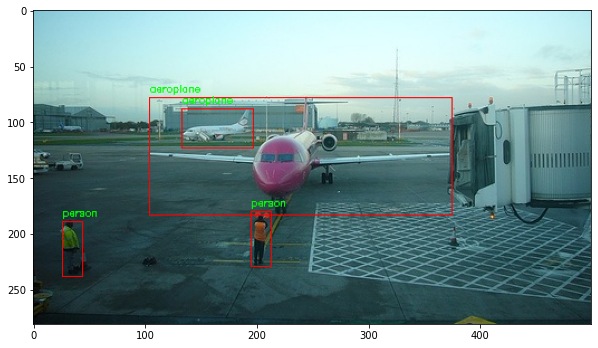

In [29]:
import os
import cv2
import matplotlib.pyplot as plt

img_dir = "/content/data/VOCdevkit/VOC2012/JPEGImages/"


tree = ET.parse(xml_file)
root = tree.getroot()

img_name = root.find('filename').text
img_size = root.find('size')
img_width = int(img_size.find('width').text)
img_height = int(img_size.find('height').text)

img_full_path = os.path.join(img_dir, img_name)
img = cv2.imread(img_full_path)
dst = img.copy()


objects = root.findall('object')
object_list = []

for obj in objects:
  box = obj.find("bndbox")
  x1 = int(box.find('xmin').text)
  y1 = int(box.find('ymin').text)
  x2 = int(box.find('xmax').text)
  y2 = int(box.find('ymax').text)

  bndbox_coor = (x1, y1, x2, y2)
  class_name = obj.find('name').text

  cv2.rectangle(dst, (x1, y1), (x2, y2), color=(0, 0, 255), thickness=1)
  cv2.putText(dst, class_name, (x1, y1-5), cv2.FONT_HERSHEY_SIMPLEX, 0.3, (0, 255, 0), thickness=1 )

  object_dict = {'class_name' : class_name, 'bndbox_coor' : bndbox_coor}
  object_list.append(object_dict)

plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))


## MS CoCo DataSet

In [30]:
!wget "http://images.cocodataset.org/zips/train2017.zip"

--2021-09-29 01:37:37--  http://images.cocodataset.org/zips/train2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.216.144.107
Connecting to images.cocodataset.org (images.cocodataset.org)|52.216.144.107|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19336861798 (18G) [application/zip]
Saving to: ‘train2017.zip’

train2017.zip       100%[===================>]  18.01G  79.3MB/s    in 4m 23s  

2021-09-29 01:42:00 (70.1 MB/s) - ‘train2017.zip’ saved [19336861798/19336861798]



In [31]:
!wget "http://images.cocodataset.org/annotations/annotations_trainval2017.zip"

--2021-09-29 01:42:33--  http://images.cocodataset.org/annotations/annotations_trainval2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.217.72.156
Connecting to images.cocodataset.org (images.cocodataset.org)|52.217.72.156|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 252907541 (241M) [application/zip]
Saving to: ‘annotations_trainval2017.zip’

annotations_trainva 100%[===================>] 241.19M  82.1MB/s    in 2.9s    

2021-09-29 01:42:36 (82.1 MB/s) - ‘annotations_trainval2017.zip’ saved [252907541/252907541]



In [32]:
mkdir data2

In [ ]:
!unzip "train2017.zip" -d /content/data2/

In [35]:
!unzip "annotations_trainval2017.zip" -d /content/data2/

Archive:  annotations_trainval2017.zip
  inflating: /content/data2/annotations/instances_train2017.json  
  inflating: /content/data2/annotations/instances_val2017.json  
  inflating: /content/data2/annotations/captions_train2017.json  
  inflating: /content/data2/annotations/captions_val2017.json  
  inflating: /content/data2/annotations/person_keypoints_train2017.json  
  inflating: /content/data2/annotations/person_keypoints_val2017.json  


In [36]:
!wget "http://images.cocodataset.org/zips/val2017.zip"

--2021-09-29 01:51:05--  http://images.cocodataset.org/zips/val2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.217.197.41
Connecting to images.cocodataset.org (images.cocodataset.org)|52.217.197.41|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 815585330 (778M) [application/zip]
Saving to: ‘val2017.zip’

val2017.zip         100%[===================>] 777.80M  72.6MB/s    in 10s     

2021-09-29 01:51:16 (75.6 MB/s) - ‘val2017.zip’ saved [815585330/815585330]



In [ ]:
!unzip "val2017.zip" -d /content/data2/

In [38]:
!ls -la /content/data2/annotations/

total 814888
drwxr-xr-x 2 root root      4096 Sep 29 01:49 .
drwxr-xr-x 5 root root      4096 Sep 29 01:51 ..
-rw-rw-r-- 1 root root  91865115 Sep  1  2017 captions_train2017.json
-rw-rw-r-- 1 root root   3872473 Sep  1  2017 captions_val2017.json
-rw-rw-r-- 1 root root 469785474 Sep  1  2017 instances_train2017.json
-rw-rw-r-- 1 root root  19987840 Sep  1  2017 instances_val2017.json
-rw-rw-r-- 1 root root 238884731 Sep  1  2017 person_keypoints_train2017.json
-rw-rw-r-- 1 root root  10020657 Sep  1  2017 person_keypoints_val2017.json


In [39]:
!sudo apt-get install jq

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libjq1 libonig4
The following NEW packages will be installed:
  jq libjq1 libonig4
0 upgraded, 3 newly installed, 0 to remove and 37 not upgraded.
Need to get 276 kB of archives.
After this operation, 930 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libonig4 amd64 6.7.0-1 [119 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libjq1 amd64 1.5+dfsg-2 [111 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 jq amd64 1.5+dfsg-2 [45.6 kB]
Fetched 276 kB in 7s (41.2 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 3.)
debconf: falling back to frontend: Readline
debconf: unable to initialize fro

In [40]:
!jq . /content/data2/annotations/instances_val2017.json > output.json

In [41]:
!head -200 output.json

{
  "info": {
    "description": "COCO 2017 Dataset",
    "url": "http://cocodataset.org",
    "version": "1.0",
    "year": 2017,
    "contributor": "COCO Consortium",
    "date_created": "2017/09/01"
  },
  "licenses": [
    {
      "url": "http://creativecommons.org/licenses/by-nc-sa/2.0/",
      "id": 1,
      "name": "Attribution-NonCommercial-ShareAlike License"
    },
    {
      "url": "http://creativecommons.org/licenses/by-nc/2.0/",
      "id": 2,
      "name": "Attribution-NonCommercial License"
    },
    {
      "url": "http://creativecommons.org/licenses/by-nc-nd/2.0/",
      "id": 3,
      "name": "Attribution-NonCommercial-NoDerivs License"
    },
    {
      "url": "http://creativecommons.org/licenses/by/2.0/",
      "id": 4,
      "name": "Attribution License"
    },
    {
      "url": "http://creativecommons.org/licenses/by-sa/2.0/",
      "id": 5,
      "name": "Attribution-ShareAlike License"
    },
    {
      "url": "http://creativecommons.org/licenses/by-nd/2.0/

In [42]:
!tail -800 output.json

          149,
          54,
          217,
          6,
          149,
          54,
          214,
          10,
          148,
          54,
          210,
          15,
          147,
          54,
          209,
          17,
          146,
          54,
          208,
          19,
          145,
          54,
          206,
          22,
          144,
          55,
          204,
          24,
          143,
          55,
          203,
          25,
          143,
          55,
          201,
          27,
          143,
          55,
          200,
          29,
          142,
          56,
          198,
          30,
          142,
          56,
          196,
          32,
          142,
          57,
          194,
          33,
          142,
          57,
          192,
          35,
          142,
          58,
          190,
          36,
          142,
          58,
          188,
          38,
          142,
          59,
          185,
          41,
          141,


In [43]:
!grep -n 'annotations' output.json

50054:  "annotations": [


In [44]:
!head -50400 output.json

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
      "id": 473869
    },
    {
      "license": 3,
      "file_name": "000000074092.jpg",
      "coco_url": "http://images.cocodataset.org/val2017/000000074092.jpg",
      "height": 500,
      "width": 332,
      "date_captured": "2013-11-23 05:20:33",
      "flickr_url": "http://farm1.staticflickr.com/158/370824877_ea2b7b2138_z.jpg",
      "id": 74092
    },
    {
      "license": 3,
      "file_name": "000000390902.jpg",
      "coco_url": "http://images.cocodataset.org/val2017/000000390902.jpg",
      "height": 500,
      "width": 333,
      "date_captured": "2013-11-23 05:25:33",
      "flickr_url": "http://farm1.staticflickr.com/82/242688429_19ec870de2_z.jpg",
      "id": 390902
    },
    {
      "license": 5,
      "file_name": "000000513688.jpg",
      "coco_url": "http://images.cocodataset.org/val2017/000000513688.jpg",
      "height": 480,
      "width": 640,
      "date_captured": "2013-11-23 20:18:29",
      "flickr_url": "http://farm8.st